In [2]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import scipy as spy
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации

In [ ]:
#Вспомогательная функция для подсчета доверительного интервала
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

**Статистическая гипотеза** - это предположение о каких-либо характеристиках случайной величины.\
Для проверки статистических гипотез зачастую применяются **статистические тесты**.\
В обобщенном виде алгоритм проверки статистической гипотезы выглядит таким образом:
* Формулировка основной (H0) и альтернативной (H1) гипотез
* Выбор уровня значимости
* Выбор статистического критерия
* Определения правила принятия решения
* Итоговое принятие решения на основе исходной выборки данных\
Данные шаги являются унифицированными и схему можно использовать почти во всех случаях.

# Статистическая проверка гипотез

Большинство тестов работает с нормально распределенными данными, поэтому первым делом нужно проверить данные на нормальность.

## Критерий Шапиро-Уилка
Проверка на принадлежность выборки нормальной генеральной совокупности\
H0: распределение выборки нормально\
H1: распределение выборки не нормально

In [39]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
data = stats.norm.rvs(scale = 30, loc = 250, size = 100)

stat, p = stats.shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Not Normal distribution (reject H0)')

Statistics=0.990, p=0.655
Normal distribution (fail to reject H0)


**p_value > 0.05, значит не можем отклонить нулевую гипотезу, значит распределение нормальное**

## t-критерий Стьюдента 
Тест на равенство средних. \
Критерий Стьюдента имеет несколько разновидностей

### 1. Одновыборочный (выборка + ГС)
Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!).\
H0:  μ =  μ0 \
H1:  μ !=  μ0

### 2. Двухвыборочный (независимые выборки)
H0:  μ1 =  μ2 \
H1:  μ1 !=  μ2

In [38]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
A = stats.norm.rvs(loc=50, scale=10, size=1100)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 

stat, p = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2.465, p=0.014
Different distribution (reject H0)


**p_value меньше уровня значимости: 0.014 < 0.05, значит отклоняем нулевую гипотезу о равенстве средних, значит различие между выборками статистически значимо**

Можно посмотреть и убедиться в этом визуально:

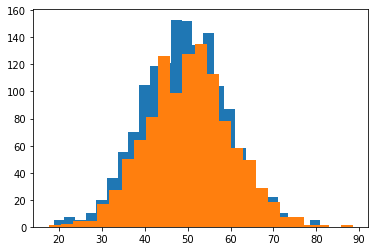

In [33]:
plt.hist(B, bins=25); 
plt.hist(A, bins=25); 

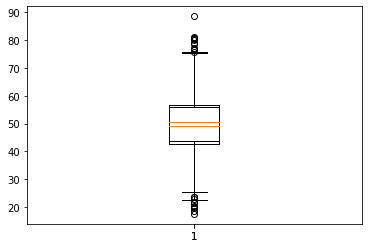

In [34]:
plt.boxplot(A);
plt.boxplot(B);

### 3. Двухвыборочный (зависимые выборки)
H0:  μ1 =  μ2 \
H1:  μ1 !=  μ2 \
По другому называется t-критерий парной выборки. Представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. Каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. 

Предположим, нас интересует оценка эффективности программы обучения компании. Один из подходов, который можно рассмотреть - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного t-критерия. \
H0: Уровень производительности сотрудников не изменился.

In [26]:
np.random.seed(42)
before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -.273, size = 100)
df = pd.DataFrame( {"before":before,
                    "after":after,
                    "change":after-before})
df.describe()

,before,after,change
count,100.000000,100.000000,100.000000
mean,246.884604,246.723127,-0.161477
std,27.245053,27.010808,4.768345
min,171.407647,172.518101,-9.866856
25%,231.972830,229.732678,-4.301303
50%,246.191311,247.144815,0.147536
75%,262.178562,261.714136,2.417852
max,305.568346,306.534314,13.327846


In [40]:
stat, p = stats.ttest_rel(a=before, b=after)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.339, p=0.736
Same distribution (fail to reject H0)


**p_value > 0.05. Нулевую гипотезку не можем отклонить, производительность сотрудников не изменилась.**

## Точный критерий Фишера
Точный критерий Фишера используется для определения того, существует ли значительная связь между двумя категориальными переменными. Используется в анализе таблиц сопряжённости **для выборок маленьких размеров.** \
H0 : Две переменные независимы (носят случайный характер)\
H1 : Две переменные не являются независимыми.

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты 
Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).

In [42]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


H0: предсказания носят случайный характер, нет взаимосвязи между предсказаниями и реальной погодой.

In [45]:
stat, pvalue = stats.fisher_exact(observations)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('переменные независимы (НЕ отвергаем H0)')
else:
	print('переменные не являются независимыми (отвергаем H0)')

Statistics=0.581, p=0.736
переменные независимы (НЕ отвергаем H0)


## Критерий Пирсона ($\chi^{2}$)
Одна из его задач сказать, насколько случайно распределены значения между группами. Позволяет проверить гипотезу, есть ли значимый перевес между группами.\

H0: между распределениями нет различий\
H1: между распределениями есть различия

Используя критерий «хи-квадрат» при уровне значимости α = 0,05, проверить,
существует ли зависимость уровня интеллектуального развития учеников от типа школы
по результатам обследования 100 сельских и 100 городских школьников: 

In [19]:
# Сгенерируем табличку 
contingency_table = pd.DataFrame(
    [  
[25, 50, 25],
[52, 41, 7]
    ],
    columns = ['Низкий', 'Нормальный', 'Высокий'],
    index = ['Городская', 'Сельская'])
print('Уровень интеллектуального развития')
print(contingency_table)

Уровень интеллектуального развития
           Низкий  Нормальный  Высокий
Городская      25          50       25
Сельская       52          41        7


In [23]:
chi, pval, dof, exp = stats.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
alpha = 0.05
print('p-value=%.6f' % (pval))

if pval < alpha:
    print('Отвергаем нулевую гипотезу и принимаем H1 (между распределениями есть различия)')
    print('Существует зависимость уровня интеллектуального развития учеников от типа школы')
else:
    print('Принимаем нулевую гипотезы (между распределениями нет различий)')
    print('Нет зависимости уровня интеллектуального развития учеников от типа школы ')    
    
# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value=0.000036
Отвергаем нулевую гипотезу и принимаем H1 (между распределениями есть различия)
Существует зависимость уровня интеллектуального развития учеников от типа школы


### Критерий Пирсона  ($\chi^{2}$) 
для проверки гипотезы о принадлежности некоторой выборки теоретическому закону распределения 

In [3]:
# Пример проверки гипотезы о принадлежности данных нормальному распрделению
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

stat, p = stats.normaltest(A) 
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Normal distribution (fail to reject H0)')
else:
	print('Not Normal distribution (reject H0)')

Statistics=6.579, p=0.037
Not Normal distribution (reject H0)


# F-тест Фишера
Используется для проверки равенства двух дисперсий, для нормальных распределений.\
H0: обе выборки имеют одинаковые дисперсии \
Не нашел готовой библиотечной функции, но на просторах интернета нашел такую функцию:

In [62]:
def f_test(x, y):
  """ F-test """
  f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
  dfn = x.size-1 #define degrees of freedom numerator 
  dfd = y.size-1 #define degrees of freedom denominator 
  p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
  return f, p

In [64]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
A = stats.norm.rvs(loc=50, scale=10, size=1100)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 

# Тест
stat, p = f_test(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.965, p=0.735
Same distribution (fail to reject H0)


# Критерий Флигнера-Килина
Используется для проверки равенства двух дисперсий. Не требует предположений о нормальности сравниваемых выборок.
H0: обе выборки имеют одинаковые дисперсии

In [8]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
A = stats.norm.rvs(loc=50, scale=10, size=1100)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 

stat, p = stats.fligner(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.339, p=0.560
Same distribution (fail to reject H0)


# U-Критерий Манна-Уитни
Критерий Манна-Уитни представляет непараметрическую альтернативу t-критерия для независимых выборок. Преимущество его состоит в том, что мы отказываемся от предположения нормальности распределения и одинаковых дисперсий. Необходимо, чтобы данные были измерены как минимум в порядковой шкале.\
H0: нет различий между распределениями выборок данных

In [10]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
A = stats.norm.rvs(loc=50, scale=10, size=1100)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 

stat, p = stats.mannwhitneyu(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=781301.000, p=0.010
Different distribution (reject H0)


# Дисперсионный анализ

Рассмотренный выше **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
30.0=24.0+6.0
F-значение=12.0
p-value=0.008000000000000002
Результат:
отклоняем нулевую гипотезу


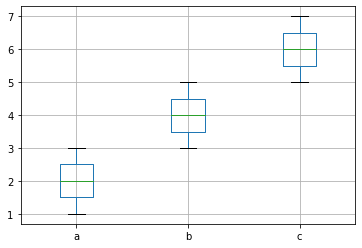

In [16]:
# Выборки которые надо сравнить
data = pd.DataFrame({
        'a': [3, 1, 2],
        'b': [5, 3, 4],
        'c': [7, 6, 5]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')

# общая средняя
grand_mean = data.values.mean()

# Общая сумма квадратов sst = ssb + ssw
sst = ((data - grand_mean)**2).values.sum()

# отклонение групповых средний от общей средней
ssb = (data.count(axis=0) * (data.mean(axis=0) - grand_mean)**2).values.sum()

# отклонения значений внутри группы от средней группы
ssw = ((data - data.mean(axis=0))**2).values.sum()

print(f'{sst}={ssb}+{ssw}')

group_count = data.shape[1]

# межгрупповой средний квадрат
dfb = group_count - 1
mssb = ssb/dfb

# внутригрупповой средний квадрат
dfw = data.size - group_count
mssw = ssw/dfw

f_value = mssb/mssw
print(f"F-значение={f_value}")

p = stats.f.sf(f_value, dfb, dfw)
print(f'p-value={p}')

alpha = 0.05
print('Результат:')
if p > alpha:
    print('НЕ отклоняем нулевую гипотезу')
else:
    print('отклоняем нулевую гипотезу')


In [17]:
# библиотечная функция для дисперсионного анализа

stat, p = stats.f_oneway(*data.values.T)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('НЕ отклоняем нулевую гипотезу')
else:
    print('отклоняем нулевую гипотезу')

Statistics=12.000, p=0.008
отклоняем нулевую гипотезу
